In [1]:
import keras
from keras.callbacks import ModelCheckpoint
from model import build_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
IN_DIR = "data/"
BATCH_SIZE = 3
EPOCHS = 20

In [3]:
# 데이터 로드
train_X = np.load(open(IN_DIR + 'train_X.npy', 'rb'))
val_X = np.load(open(IN_DIR + 'val_X.npy', 'rb'))
test_X = np.load(open(IN_DIR + 'test_X.npy', 'rb'))

In [4]:
# TODO : remove this lines
train_X = train_X.reshape(-1, 53215, 3)
val_X = val_X.reshape(-1, 53215, 3)
test_X = test_X.reshape(-1, 53215, 3)

train_y = np.load(open(IN_DIR + 'train_y.npy', 'rb'))
val_y = np.load(open(IN_DIR + 'val_y.npy', 'rb'))
test_y = np.load(open(IN_DIR + 'test_y.npy', 'rb'))

In [5]:
# 모델 로드
model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 53215, 3)          0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 53215, 3)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 53215, 64)         256       
_________________________________________________________________
batch_normalization_6 (Batch (None, 53215, 64)         256       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 53215, 64)         4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 53215, 64)         256       
_________________________________________________________________
lambda_2 (Lambda)            (None, 53215, 64)         0   

In [6]:
history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(val_X, val_y))

Train on 19984 samples, validate on 2487 samples
Epoch 1/20
19984/19984 [==============================] - 3199s 160ms/step - loss: 2.1249 - accuracy: 0.2088 - val_loss: 1.8512 - val_accuracy: 0.2678
Epoch 2/20
19984/19984 [==============================] - 3185s 159ms/step - loss: 1.8704 - accuracy: 0.2376 - val_loss: 1.8215 - val_accuracy: 0.2742
Epoch 3/20
19984/19984 [==============================] - 3158s 158ms/step - loss: 1.8371 - accuracy: 0.2574 - val_loss: 1.8308 - val_accuracy: 0.2766
Epoch 4/20
19984/19984 [==============================] - 3153s 158ms/step - loss: 1.8151 - accuracy: 0.2702 - val_loss: 1.8129 - val_accuracy: 0.2774
Epoch 5/20
19984/19984 [==============================] - 3159s 158ms/step - loss: 1.8073 - accuracy: 0.2770 - val_loss: 1.8065 - val_accuracy: 0.2746
Epoch 6/20
19984/19984 [==============================] - 3167s 158ms/step - loss: 1.8055 - accuracy: 0.2787 - val_loss: 1.8391 - val_accuracy: 0.2750
Epoch 7/20
19984/19984 [=====================

In [7]:
# 정확도 출력
results = model.evaluate(test_X, test_y)
print('Test accuracy: ', results[1])

ResourceExhaustedError:  OOM when allocating tensor with shape[32,1024,1,53215] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node conv1d_3/convolution (defined at c:\users\vi\pycharmprojects\pointnet\venv\lib\site-packages\keras\backend\tensorflow_backend.py:3007) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_11515]

Function call stack:
keras_scratch_graph


NameError: name 'results' is not defined

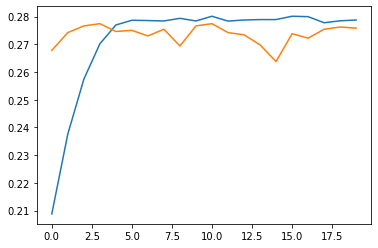

In [8]:
# 그래프 출력
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('{} epochs, Accuracy : {:.6f}'.format(EPOCHS, results[1]))
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.savefig('acc.png')
plt.show()